# 📊 Exploratory Data Analysis (EDA) on Scraped Book Dataset

This notebook performs a detailed EDA on the dataset `books.csv`, which was generated by scraping [BooksToScrape](https://books.toscrape.com).

In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [3]:
# Step 2: Load the dataset
df = pd.read_csv('books.csv')
df.head()

,Title,Price (£),Availability,Rating,Product URL,Price (₹)
0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,5435.85
1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,5642.70
2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,5260.50
3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,5021.10
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,5694.15


## 🔍 Step 3: Basic Information & Data Types

In [4]:
# Dataset overview
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price (£)     1000 non-null   float64
 2   Availability  1000 non-null   object 
 3   Rating        1000 non-null   int64  
 4   Product URL   1000 non-null   object 
 5   Price (₹)     1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB
None


,Title,Price (£),Availability,Rating,Product URL,Price (₹)
count,1000,1000.00000,1000,1000.000000,1000,1000.000000
unique,999,NaN,1,NaN,1000,NaN
top,The Star-Touched Queen,NaN,In stock,NaN,https://books.toscrape.com/catalogue/1000-plac...,NaN
freq,2,NaN,1000,NaN,1,NaN
mean,NaN,35.07035,NaN,2.923000,NaN,3682.386750
std,NaN,14.44669,NaN,1.434967,NaN,1516.902415
min,NaN,10.00000,NaN,1.000000,NaN,1050.000000
25%,NaN,22.10750,NaN,2.000000,NaN,2321.287500
50%,NaN,35.98000,NaN,3.000000,NaN,3777.900000
75%,NaN,47.45750,NaN,4.000000,NaN,4983.037500


## 📉 Step 4: Check for Missing Values

In [5]:
# Check for missing values
df.isnull().sum()

,0
Title,0
Price (£),0
Availability,0
Rating,0
Product URL,0
Price (₹),0


## 💷 Step 5: Price Distribution (in ₹)

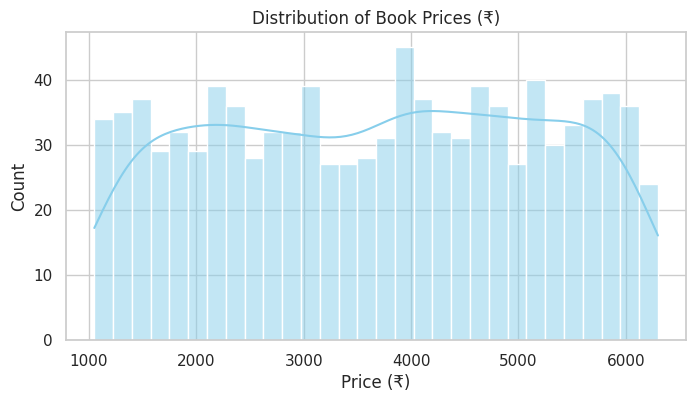

In [6]:
# Histogram of book prices in ₹
plt.figure(figsize=(8, 4))
sns.histplot(df['Price (₹)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Prices (₹)')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()

## 📦 Step 6: Book Availability Analysis

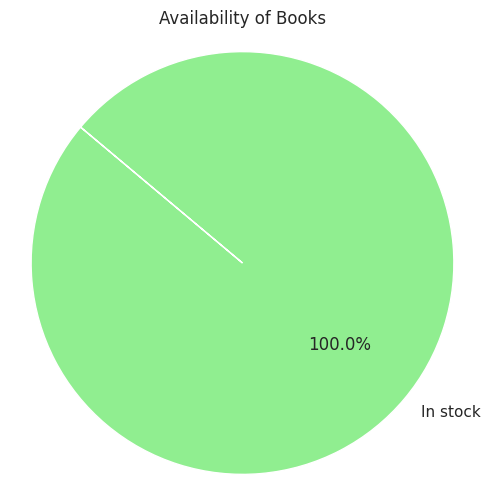

In [7]:
# Pie chart of availability
availability_counts = df['Availability'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Availability of Books')
plt.axis('equal')
plt.show()

In [8]:
# Average price by availability
df.groupby('Availability')['Price (₹)'].mean()

,Price (₹)
Availability,
In stock,3682.38675


## ⭐ Step 7: Rating Distribution & Analysis

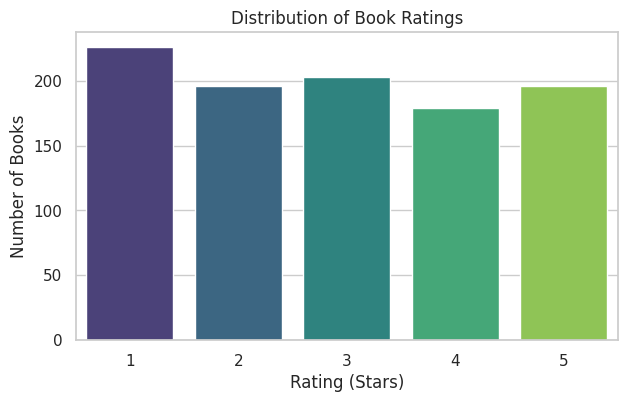

In [9]:
# Countplot of ratings
plt.figure(figsize=(7, 4))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Books')
plt.show()

In [10]:
# Average price by rating
df.groupby('Rating')['Price (₹)'].mean().sort_index()

,Price (₹)
Rating,
1,3628.925442
2,3655.146429
3,3642.662069
4,3789.796089
5,3714.321429


## 💸 Step 8: Top 10 Most Expensive Books

In [11]:
df.sort_values('Price (₹)', ascending=False)[['Title', 'Price (₹)', 'Availability', 'Rating']].head(10)

,Title,Price (₹),Availability,Rating
648,The Perfect Play (Play by Play #1),6298.95,In stock,3
617,Last One Home (New Beginnings #1),6297.90,In stock,3
860,Civilization and Its Discontents,6294.75,In stock,2
560,The Barefoot Contessa Cookbook,6291.60,In stock,5
366,The Diary of a Young Girl,6289.50,In stock,3
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,6269.55,In stock,3
133,Thomas Jefferson and the Tripoli Pirates: The ...,6262.20,In stock,1
387,Boar Island (Anna Pigeon #19),6245.40,In stock,3
549,The Man Who Mistook His Wife for a Hat and Oth...,6242.25,In stock,4
393,The Improbability of Love,6242.25,In stock,1


from matplotlib import pyplot as plt
_df_0['Price (₹)'].plot(kind='hist', bins=20, title='Price (₹)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Price (₹)', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price (₹)'].plot(kind='line', figsize=(8, 4), title='Price (₹)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

## 🧾 Step 9: Top 10 Cheapest Books

In [12]:
df.sort_values('Price (₹)')[['Title', 'Price (₹)', 'Availability', 'Rating']].head(10)

,Title,Price (₹),Availability,Rating
638,An Abundance of Katherines,1050.00,In stock,5
501,The Origin of Species,1051.05,In stock,4
716,The Tipping Point: How Little Things Can Make ...,1052.10,In stock,2
84,Patience,1066.80,In stock,3
302,Greek Mythic History,1074.15,In stock,5
558,The Fellowship of the Ring (The Lord of the Ri...,1078.35,In stock,2
479,History of Beauty,1080.45,In stock,4
242,The Lucifer Effect: Understanding How Good Peo...,1092.00,In stock,1
434,"NaNo What Now? Finding your editing process, r...",1093.05,In stock,4
274,Pet Sematary,1108.80,In stock,3


## 📊 Step 10: Correlation Heatmap (Numeric Fields Only)

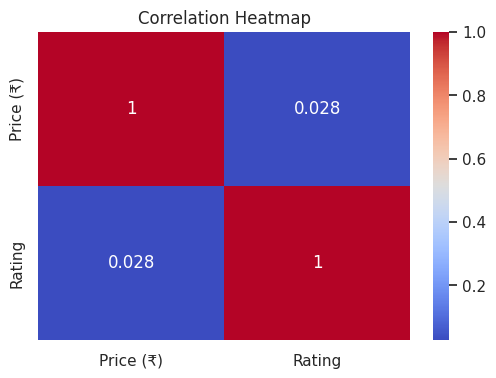

In [13]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Price (₹)', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 📊 Insights from the Correlation Heatmap
Low Correlation Between Price and Rating:

- The correlation coefficient between Price (₹) and Rating is 0.028, which is very close to 0.

- This implies that there is no significant linear relationship between a book’s price and its user rating.

Interpretation:

- Higher-priced books do not necessarily have higher ratings, and vice versa.

- Price and rating seem to vary independently of each other in this dataset.

Diagonal Values = 1:

- The diagonal shows 1.0 correlation since any feature is perfectly correlated with itself.

- This helps validate that the heatmap is symmetric and computed correctly.

Visual Encoding:

- The dark red cells (1.0) represent high correlation (perfect self-correlation).

- The blue color near 0.02 shows very weak or no correlation between different features.

In short:
  - 🔍 Correlation Heatmap:
We analyzed the relationship between price and rating. The heatmap reveals that these features have no significant correlation (r ≈ 0.028), indicating that price does not influence user ratings in this dataset.


## ✅ Summary
- Analyzed 1000 books scraped from BooksToScrape
- Visualized price and rating distributions
- Checked availability proportions and pricing trends
- Identified cheapest and most expensive books
- Conducted correlation analysis

